# Feature Selection

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Analysis

### Completion selection

In [6]:
cons = pd.DataFrame({
                    'columns': df.columns,
                    'type': df.dtypes,
                    'missing': df.isna().sum(),
                    'size': df.shape[0],
                    'unique': df.nunique()
                   })

cons['percentage'] = round(cons['missing'] / cons['size'], 2)

In [7]:
cons

,columns,type,missing,size,unique,percentage
Id,Id,int64,0,1460,1460,0.00
MSSubClass,MSSubClass,int64,0,1460,15,0.00
MSZoning,MSZoning,object,0,1460,5,0.00
LotFrontage,LotFrontage,float64,259,1460,110,0.18
LotArea,LotArea,int64,0,1460,1073,0.00
...,...,...,...,...,...,...
MoSold,MoSold,int64,0,1460,12,0.00
YrSold,YrSold,int64,0,1460,5,0.00
SaleType,SaleType,object,0,1460,9,0.00
SaleCondition,SaleCondition,object,0,1460,6,0.00


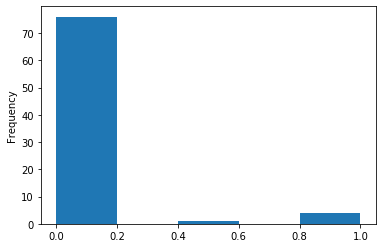

In [8]:
cons.percentage.plot.hist(bins = 5)

### Removes columns with missing data

In [9]:
print('Column count with up to 20% missing data', cons[cons.percentage < 0.2].shape[0])
print('Column count with 0% missing data', cons[cons.percentage == 0].shape[0])

Column count with up to 20% missing data 76
Column count with 0% missing data 63


In [10]:
cons[cons.percentage == 0]['type'].value_counts()

int64     35
object    28
Name: type, dtype: int64

In [11]:
cons['complete'] = ['complete' if x == 0 else 'missing' for x in cons['percentage']]

In [12]:
keeps = list(cons[cons['complete'] == 'complete']['columns'])
df = df[keeps]

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
numeric_columns = list(cons[((cons['type'] != 'object') &
                                (cons['complete'] == 'complete'))]['columns'])

## Exploration

Id


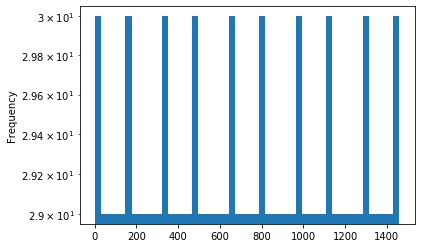

MSSubClass


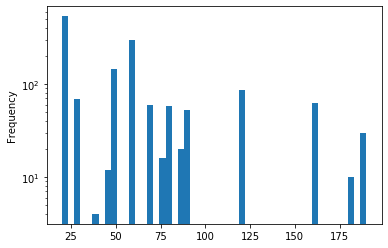

LotArea


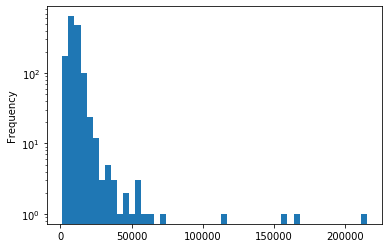

OverallQual


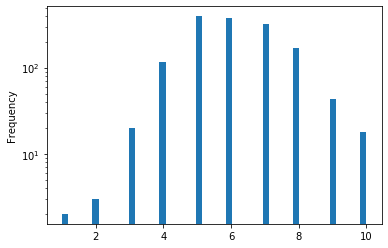

OverallCond


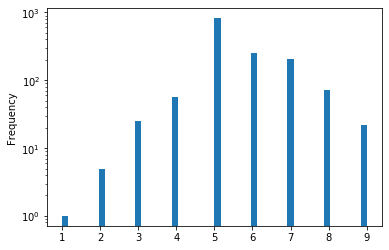

YearBuilt


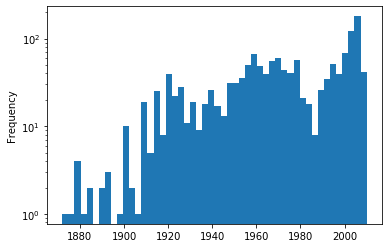

YearRemodAdd


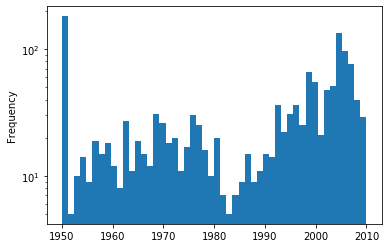

BsmtFinSF1


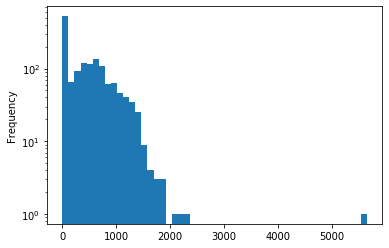

BsmtFinSF2


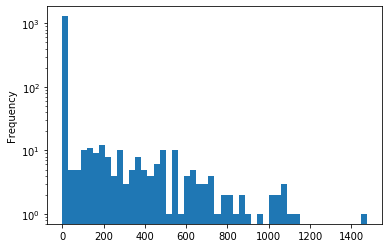

BsmtUnfSF


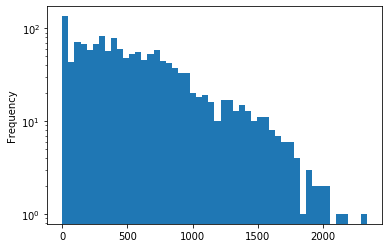

TotalBsmtSF


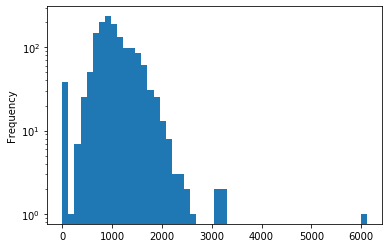

1stFlrSF


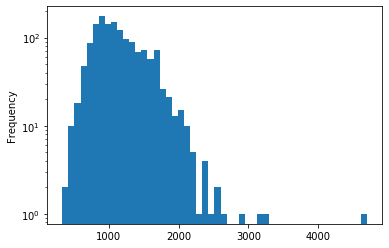

2ndFlrSF


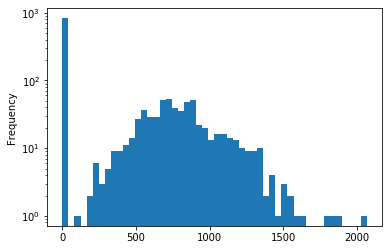

LowQualFinSF


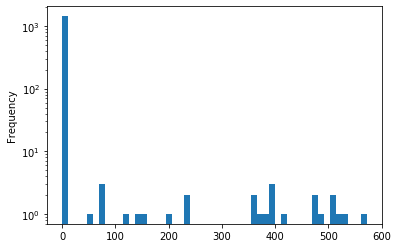

GrLivArea


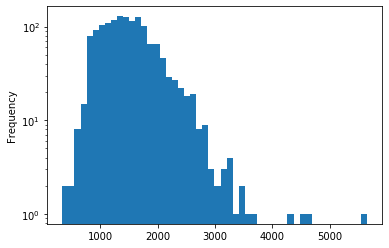

BsmtFullBath


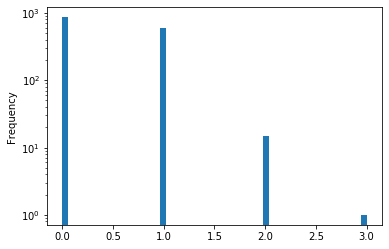

BsmtHalfBath


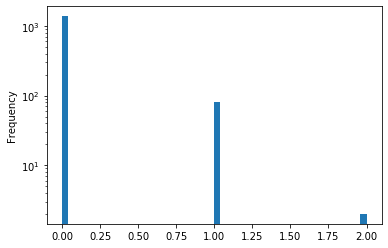

FullBath


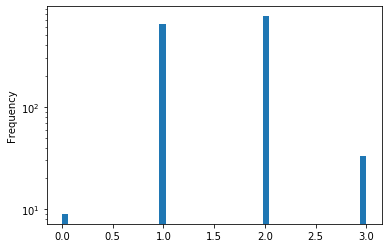

HalfBath


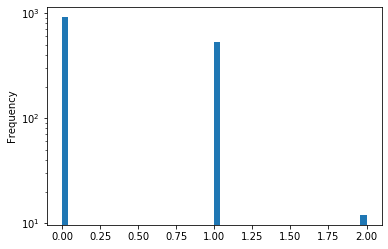

BedroomAbvGr


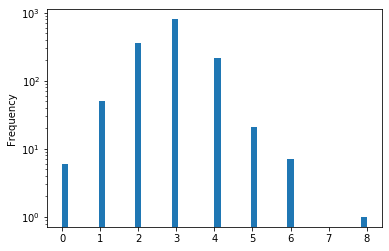

KitchenAbvGr


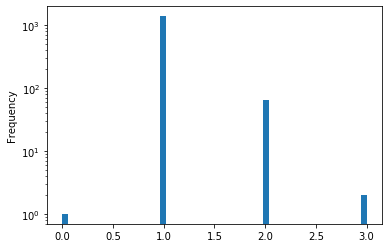

TotRmsAbvGrd


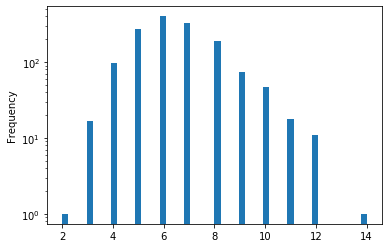

Fireplaces


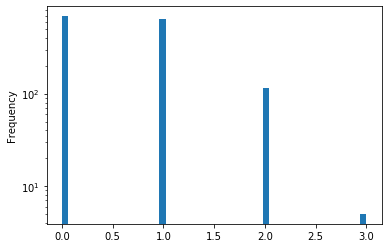

GarageCars


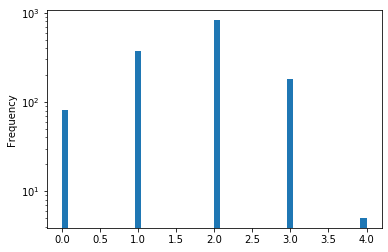

GarageArea


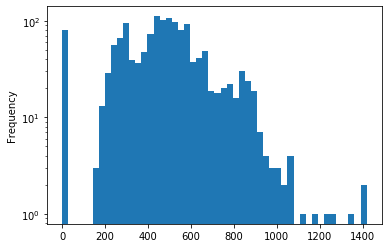

WoodDeckSF


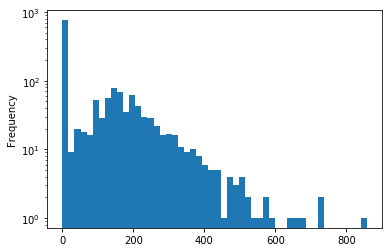

OpenPorchSF


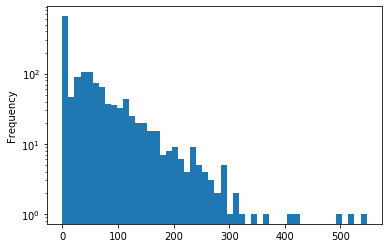

EnclosedPorch


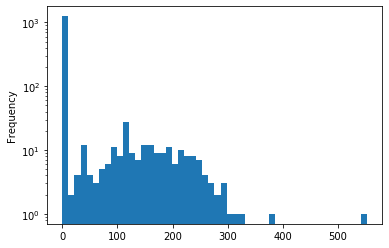

3SsnPorch


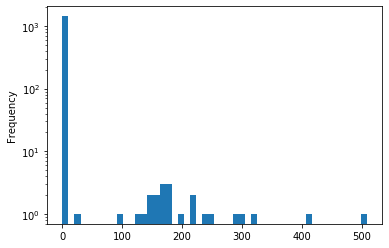

ScreenPorch


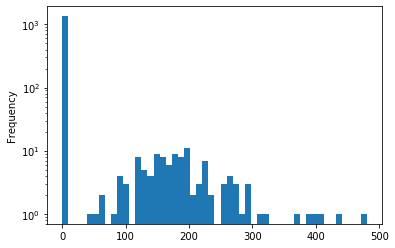

PoolArea


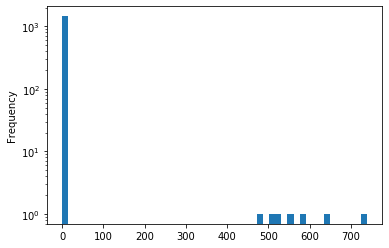

MiscVal


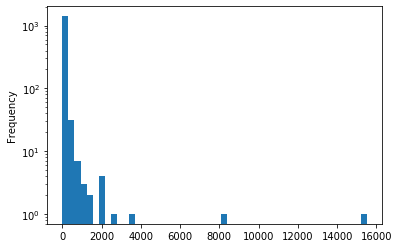

MoSold


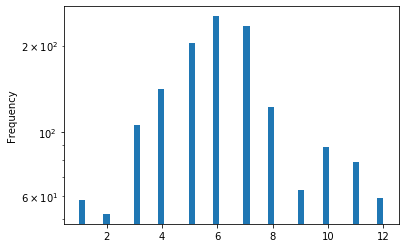

YrSold


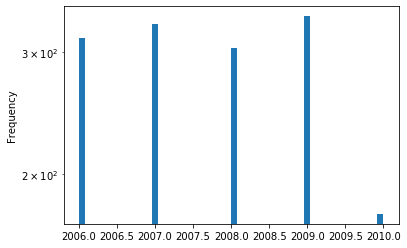

SalePrice


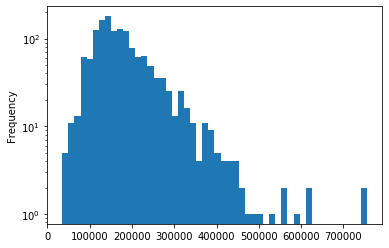

In [15]:
for column in numeric_columns:
    print(column)
    df[column].plot.hist(bins = 50, log = True)
    plt.show()

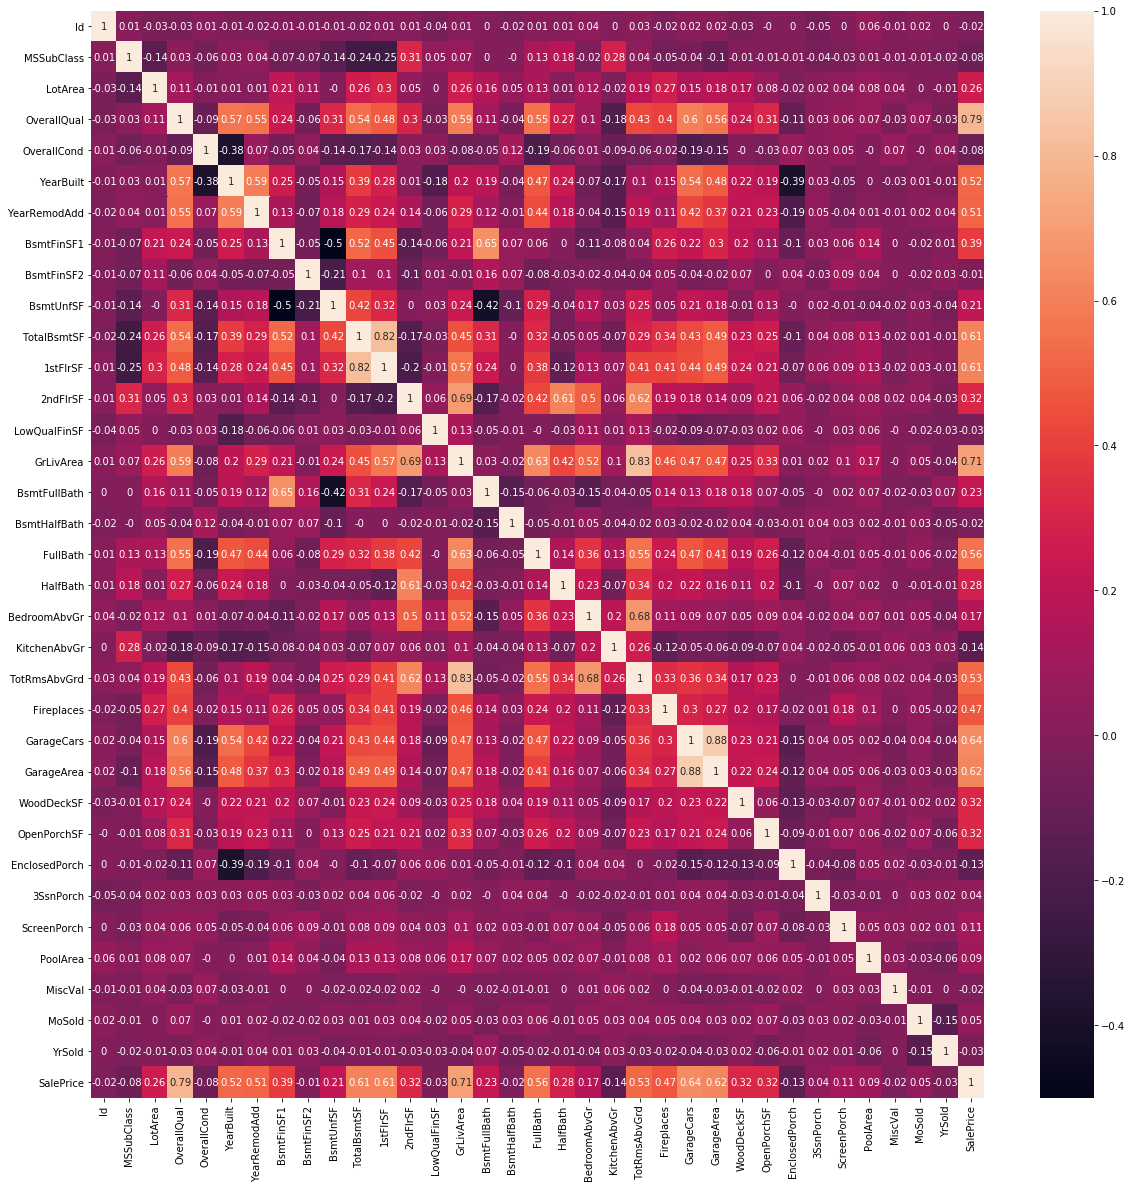

In [16]:
#Analyzes the correlation between numerical variables
plt.figure(figsize = (20, 20))
sns.heatmap(df[numeric_columns].corr().round(2), annot = True)

In [17]:
correlated = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

## Analyze features with yellowbrick

In [18]:
#Removes the column Id
numeric_columns.remove('Id')
df = df[numeric_columns]

In [19]:
y_train = df['SalePrice']
X_train = df.drop(columns = 'SalePrice')

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


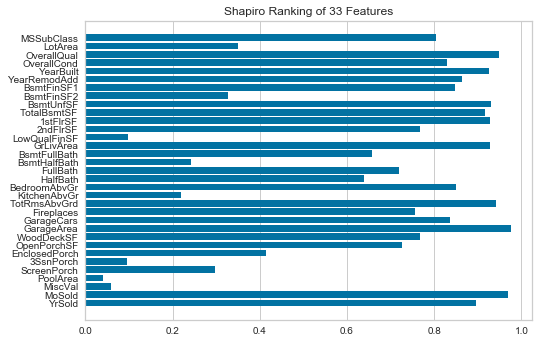

In [20]:
from yellowbrick.features import Rank1D

visualize = Rank1D(algorithm = 'shapiro')

visualize.fit(X_train, y_train)
visualize.transform(X_train)
visualize.show()

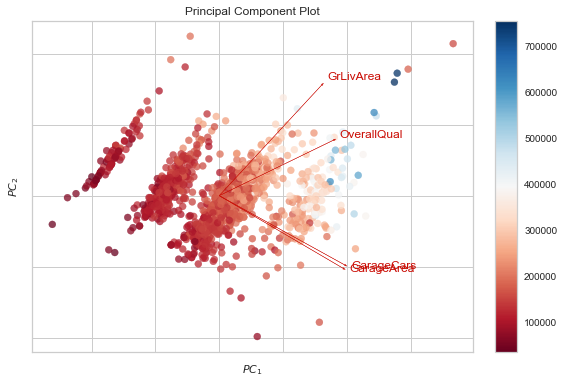

In [22]:
from yellowbrick.features import PCA

visualize = PCA(scale = True, proj_features = True, projection = 2)
visualize.fit_transform(X_train[correlated], y_train)
visualize.show()

## Training the model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
training_columns = X_train.columns

In [36]:
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')

In [37]:
y_test = y_test['SalePrice']

In [40]:
X_test = X_test[training_columns].fillna(df[training_columns].mean())

In [44]:
y_pred = reg.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error

In [52]:
normal_error = mean_squared_error(y_pred = y_pred, y_true = y_test)

In [53]:
normal_error

4647194215.337622

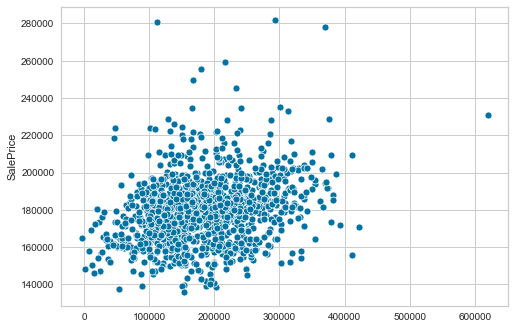

In [54]:
sns.scatterplot(y_pred, y_test)

## Apply Feature Selection

In [49]:
from sklearn.feature_selection import RFE

In [50]:
rfe = RFE(reg)

In [51]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [56]:
pd.DataFrame({
    'columns': X_train.columns,
    'boo,': rfe.get_support(),
    'coefficients': pd.Series(reg.coef_)
})

,columns,"boo,",coefficients
0,MSSubClass,True,-162.672852
1,LotArea,False,0.396228
2,OverallQual,True,17905.067194
3,OverallCond,True,4418.794796
4,YearBuilt,True,346.653503
5,YearRemodAdd,True,137.073924
6,BsmtFinSF1,False,11.833598
7,BsmtFinSF2,False,-2.728260
8,BsmtUnfSF,False,0.787735
9,TotalBsmtSF,False,9.893072


In [57]:
X_train_important = rfe.transform(X_train)
X_test_important = rfe.transform(X_test)

In [60]:
reg.fit(X_train_important, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred_imp = reg.predict(X_test_important)

In [62]:
erro_imp= mean_squared_error(y_pred = y_pred_imp, y_true = y_test)

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


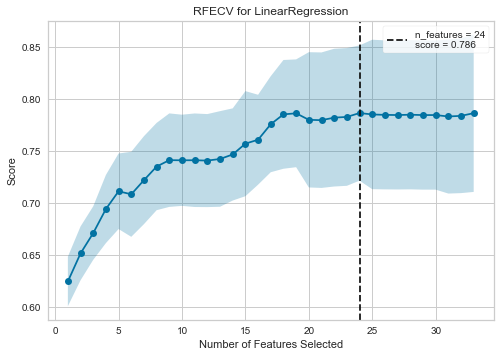

In [64]:
from yellowbrick.model_selection import RFECV

#Instantiate RFECV visualizer with a linear SVM classifier
visualize = RFECV(reg)

visualize.fit(X_train, y_train) #Fit the data to the visualizer
visualize.show() #Finalize and render the figure

## Apply PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(0.95)

In [67]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
pca.explained_variance_ratio_

array([0.98511677])

In [69]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [70]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred_pca = reg.predict(X_test_pca)

In [72]:
erro_pca = mean_squared_error(y_pred = y_pred_pca, y_true = y_test)

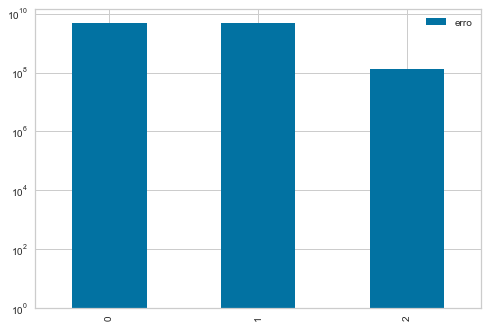

In [76]:
pd.DataFrame({
    'erro': [normal_error, erro_imp, erro_pca]
}).plot(kind = 'bar', log = True)